# Exercise 9: Sound and music description

With this exercise you will learn to describe sounds with simple machine learning methods. You will learn to use the Freesound API to load pre-computed sound descriptors from Freesound and to perform sound clustering and classification with them. You will work with instrumental sounds, thus learning what audio features are useful for characterizing them.

There are four parts in this exercise: 1) Download sounds and descriptors from Freesound, 2) Select two descriptors for a good sound clustering, 3) Cluster sounds using k-means, and 4) Classify sounds using k-NN.

We provide the code for each task, thus no need to get involved in much programming. 

### Relevant Concepts

#### Freesound API
With the Freesound API you can browse, search, and retrieve information from Freesound, such as automatically extracted features from audio files. You can also perform advanced queries combining content analysis features and other metadata (tags, etc...). With the API you can do text searches similar to what you can do from the advanced searches in the website http://freesound.org/search/?q, but implementing the queries in software. If you are interested in knowing more about the Freesound API, you can see examples of using it with python in: https://github.com/MTG/freesound-python/blob/master/examples.py and you can read the API documentation, http://www.freesound.org/docs/api/

#### Sound descriptors
In this exercise, you will use sound descriptors that have been pre-computed with Essentia, https://essentia.upf.edu and are stored in the Freesound database together with the corresponding sounds. Many sound descriptors can be extracted using Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) and in Freesound, a number of them are used. In the Freesound API documentation there is specifc information of the descriptors available in Freesound, https://freesound.org/docs/api/analysis_index.html.

### Euclidian distance
The Euclidian distance is the straight-line distance between two points in an n-dimensional space, thus the distance between points $p$ and $q$ is the length of the line segment connecting them. If $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance, $d$, from $p$ to $q$, or from $q$ to $p$ is given by the Pythagorean formula:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### K-means clustering (k-means)
K-means clustering is a method of vector quantization that is popular for cluster analysis in data mining. K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The problem is computationally difficult (NP-hard), however, efficient heuristic algorithms converge quickly to a local optimum. 

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, where $μ_i$ is the mean of points in $S_i$.


### K-nearest neighbours classifier (k-NN)
K-nearest neighbours classification (k-NN) is a non-parametric method in which the input consists of the $k$ closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


## Part 1: Download sounds and descriptors from Freesound

Download a collection of instrumental sounds and their descriptors from Freesound using the Freesound API.

First get a Freesound API key from http://www.freesound.org/apiv2/apply/ and create a directory in the workspace with the name `testDownload` to store the sounds and descriptors. You also need to install the python client for the freesound API. Do this by cloning the repository https://github.com/MTG/freesound-python, into a folder and installing it following the instructions. You will have to import the freesound module in the code.

You will be calling the function `download_sounds_freesound()` whose input parameters are:
1. `queryText` (string): A single word or a string of words without spaces (use hyphens), typically the name of the instrument. e.g. (eg. "violin", "trumpet", "cello", "bassoon", etc.)
2. `tag` (string): tag to be used for filtering the searched sounds (e.g., "multisample", "single-note", "velocity", "tenuto", etc.).
3. `duration` (2 floating point numbers): min and max duration (seconds) of the sound to filter, e.g., (0.2,15).
4. `API_Key` (string): your API key.
5. `outputDir` (string): path to the directory where you want to store the sounds and their descriptors.
6. `topNResults` (integer): number of results (sounds) that you want to download.
7. `featureExt` (file extension): file extension for storing sound descriptor (.json, typically).

In the call to `download_sounds_freesound()` you will have to choose the appropriate queryText, tag, and duration, to return single notes/strokes of instrumental sounds. The first twenty results of the query should be "good". Note that the tag can be empty. Example of a query to obtain single notes of violin could be: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. This returns 20 single notes of violin sounds and the script stores them in the `testDownload` directory (the directory has to be created beforehand).

Download and store twenty sound examples of each instrument using the `download_sounds_freesound()` function given below. The examples need to be representative of the instrument and coherent, single notes (melodic instruments) or single strokes (percussion instruments), and shorter than 10 seconds. Specify a good query text, tag, and duration to query for the chosen instruments. Refine your search parameters until you get twenty adequate samples for each instrument. Select three instruments to be used out of this set: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (cymbals used in Beijing Opera). Listen to the sounds downloaded and look at the descriptor .json files.

Before using the API to download the sounds, we recommend to do the same query using the Freesound website and checking that the top 20 results are good.

In [1]:
import os, sys
import json
import freesound as fs

descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

In [2]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key,"token")  
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.system("mkdir " + outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [10]:
# 1.1: call download_sounds_freesound for 3 instruments with parameters to obtain adequate sounds
### your code here

MY_API_KEY = "rbN1IKXf7ge0bsQS7TVnYk0EO1CGi7yGTNe7K2Qj"

# Create the output directory if it doesn't exist
# if not os.path.exists("testDownload/"):
#    os.makedirs("testDownload/")

# --- Instrument 1: Violin (Melodic) ---
print("Downloading Violin sounds...")
download_sounds_freesound(
    queryText="violin",
    API_Key=MY_API_KEY,
    outputDir="testDownload/",
    topNResults=20,
    duration=(0.2, 10),    # Min 0.2s to avoid glitches, Max 10s
    tag="single-note"      # We specifically want clean single notes
)

# --- Instrument 2: Trumpet (Melodic) ---
print("Downloading Trumpet sounds...")
download_sounds_freesound(
    queryText="trumpet",
    API_Key=MY_API_KEY,
    outputDir="testDownload/",
    topNResults=20,
    duration=(0.2, 10),
    tag="single-note"
)

# --- Instrument 3: Naobo (Percussive) ---
# Naobo are cymbals. We don't use "single-note" tag here because percussion 
# uploads often lack it. Short duration is enough to filter them.
print("Downloading Naobo sounds...")
download_sounds_freesound(
    queryText="naobo",
    API_Key=MY_API_KEY,
    outputDir="testDownload/",
    topNResults=20,
    duration=(0, 5),       # Percussive sounds are usually short
)

print("Download complete!")

### explain the coherence of the sound collections obtained
"""
The sound collection consists of 20 samples for each of the three selected instruments: Violin, Trumpet, and Naobo. 

The dataset is coherent because the selected files represent isolated sound events rather than full musical phrases. 
   - For the **Violin** and **Trumpet** (melodic instruments), the use of the 'single-note' tag and a specific duration window (0.2s to 10s) ensured that the downloaded files are individual notes with distinct pitches, avoiding loops or long melodies.
   - For the **Naobo** (a percussive instrument), the samples are short, single strokes typical of cymbals. 
   - The Violin samples generally exhibit sustained bowed textures.
   - The Trumpet samples show the characteristic brass timbre with defined attacks.
   - The Naobo samples provide sharp, transient-heavy percussive sounds which will offer a good contrast to the melodic instruments during the clustering analysis.

All files are constrained within a short duration (<10s), making them comparable and suitable for feature extraction and clustering tasks.

"""


Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.
Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.
Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.
Download complete!


"\nThe sound collection consists of 20 samples for each of the three selected instruments: Violin, Trumpet, and Naobo. \n\nThe dataset is coherent because the selected files represent isolated sound events rather than full musical phrases. \n   - For the **Violin** and **Trumpet** (melodic instruments), the use of the 'single-note' tag and a specific duration window (0.2s to 10s) ensured that the downloaded files are individual notes with distinct pitches, avoiding loops or long melodies.\n   - For the **Naobo** (a percussive instrument), the samples are short, single strokes typical of cymbals. \n   - The Violin samples generally exhibit sustained bowed textures.\n   - The Trumpet samples show the characteristic brass timbre with defined attacks.\n   - The Naobo samples provide sharp, transient-heavy percussive sounds which will offer a good contrast to the melodic instruments during the clustering analysis.\n\nAll files are constrained within a short duration (<10s), making them comp

In [3]:
import urllib.request  
import shutil          


def download_sounds_freesound(queryText="", tag=None, duration=None, API_Key="", outputDir="", topNResults=5, featureExt='.json'):
    """
    Downloads sounds and descriptors. 
    Uses urllib for stability and skips sounds that miss required descriptors.
    """
    
    # Check compulsory input parameters
    if queryText == "": return -1
    if API_Key == "": return -1
    if outputDir == "" or not os.path.exists(outputDir):
        print("Creating output directory...")
        os.makedirs(outputDir, exist_ok=True)

    # Setting up the Freesound client
    fsClnt = fs.FreesoundClient()
    fsClnt.set_token(API_Key, "token")

    # Creating filter strings
    flt_dur = f" duration:[{duration[0]} TO {duration[1]}]" if (duration and type(duration) == tuple) else ""
    flt_tag = f"tag:{tag}" if (tag and type(tag) == str) else ""

    # Querying Freesound
    print(f"Querying Freesound for '{queryText}' with filters: {flt_tag} {flt_dur}...")
    page_size = 30
    filter_str = (flt_tag + " " + flt_dur).strip()
    
    try:
        # We request specific analysis descriptors in the query
        qRes = fsClnt.text_search(
            query=queryText, 
            filter=filter_str, 
            sort="score", 
            fields="id,name,previews,username,url,analysis", 
            descriptors=','.join(descriptors), 
            page_size=page_size, 
            normalized=1
        )
    except Exception as e:
        print(f"Error connecting to Freesound API: {e}")
        return

    # Prepare output directory for this query
    outDir2 = os.path.join(outputDir, queryText)
    if os.path.exists(outDir2):
        shutil.rmtree(outDir2) # Clean existing folder to start fresh
    os.makedirs(outDir2)

    pageNo = 1
    sndCnt = 0     # Counter for successfully downloaded sounds
    indCnt = 0     # Counter for total sounds checked
    totalSnds = 1000 # High limit to ensure we find enough valid sounds
    
    downloadedSounds = []

    while(True):
        # Stop if we checked too many sounds without success
        if indCnt >= totalSnds:
            print(f"Stopped after checking {totalSnds} sounds. Found {sndCnt} valid files.")
            break
            
        try:
            # Calculate correct index for pagination
            idx_in_page = indCnt - ((pageNo-1) * page_size)
            
            # Safety check if we ran out of results on the current page
            if idx_in_page >= len(qRes.results):
                 break

            sound = qRes[idx_in_page]
            
            print(f"Checking sound ID {sound.id}...", end=" ")
            
            # Create specific directory for sound
            outDir1 = os.path.join(outputDir, queryText, str(sound.id))
            if os.path.exists(outDir1): shutil.rmtree(outDir1)
            os.makedirs(outDir1)
            
            mp3Name = str(sound.previews.preview_lq_mp3.split("/")[-1])
            mp3Path = os.path.join(outDir1, mp3Name)
            ftrPath = mp3Path.replace('.mp3', featureExt)

            # --- CRITICAL SECTION: DOWNLOAD & VALIDATE ---
            
            # 1. Download MP3 using urllib (more robust than fs library)
            urllib.request.urlretrieve(sound.previews.preview_lq_mp3, mp3Path)
            
            # 2. Extract Descriptors
            # We iterate through the required list. If any is missing/None, we skip this sound.
            features = {}
            for desc in descriptors:
                features[desc] = []
                val = eval("sound.analysis." + desc) 
                
                # Check if the descriptor value is valid (not None)
                if val is None: 
                    raise ValueError(f"Missing descriptor: {desc}")
                
                features[desc].append(val)
            
            # 3. Save JSON features only if everything above succeeded
            json.dump(features, open(ftrPath, 'w'))
            
            print("OK! Downloaded.")
            sndCnt += 1
            downloadedSounds.append([str(sound.id), sound.url])
            
        except Exception as e:
            # If download fails or descriptors are missing, clean up and skip
            print(f"Skipping (Invalid).")
            if 'outDir1' in locals() and os.path.exists(outDir1):
                shutil.rmtree(outDir1)
        
        indCnt += 1
        
        # Handle Pagination (Move to next page if needed)
        if indCnt % page_size == 0:
            try:
                qRes = qRes.next_page()
                pageNo += 1
            except:
                print("No more pages available.")
                break
        
        # Stop if we reached the target number of sounds
        if sndCnt >= topNResults:
            print(f"Successfully downloaded {topNResults} sounds for {queryText}!")
            break

    # Save the list of downloaded files
    with open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w') as fid:
        for elem in downloadedSounds:
            fid.write('\t'.join(elem)+'\n')

In [ ]:
MY_API_KEY = "rbN1IKXf7ge0bsQS7TVnYk0EO1CGi7yGTNe7K2Qj"

# Violin Task
print("\n--- Starting Violin ---")
download_sounds_freesound(queryText="violin", API_Key=MY_API_KEY, outputDir="testDownload/", 
                          topNResults=20, duration=(0.2, 10), tag="single-note")

# Trumpet Task
print("\n--- Starting Trumpet ---")
download_sounds_freesound(queryText="trumpet", API_Key=MY_API_KEY, outputDir="testDownload/", 
                          topNResults=20, duration=(0.2, 10), tag="single-note")

# Naobo Task
print("\n--- Starting Naobo ---")
download_sounds_freesound(queryText="naobo", API_Key=MY_API_KEY, outputDir="testDownload/", 
                          topNResults=20, duration=(0, 5))

print("\nAll tasks finished.")


--- Starting Violin ---
Querying Freesound for 'violin' with filters: tag:single-note  duration:[0.2 TO 10]...
Checking sound ID 247646... OK! Downloaded.
Checking sound ID 247645... OK! Downloaded.
Checking sound ID 247644... OK! Downloaded.
Checking sound ID 247642... OK! Downloaded.
Checking sound ID 247641... OK! Downloaded.
Checking sound ID 247639... OK! Downloaded.
Checking sound ID 247638... OK! Downloaded.
Checking sound ID 247637... OK! Downloaded.
Checking sound ID 247636... OK! Downloaded.
Checking sound ID 247635... OK! Downloaded.
Checking sound ID 247634... OK! Downloaded.
Checking sound ID 247633... OK! Downloaded.
Checking sound ID 247632... OK! Downloaded.
Checking sound ID 247631... OK! Downloaded.
Checking sound ID 247630... OK! Downloaded.
Checking sound ID 247629... OK! Downloaded.
Checking sound ID 247628... OK! Downloaded.
Checking sound ID 247627... OK! Downloaded.
Checking sound ID 247626... OK! Downloaded.
Checking sound ID 247625... OK! Downloaded.
Successf

### Note on Code Implementation
Before analyzing the collection, it is important to note that the provided `download_sounds_freesound` function was refactored. The original script encountered frequent failures when retrieving specific descriptors or handling network requests (returning "Not able to download required number of sounds"). I modified the function to use the standard `urllib` library for more robust file retrieval and implemented a check to skip sounds that lacked the specific required descriptors. 

This ensured that I successfully obtained 20 valid files for each instrument: Violin, Trumpet, and Naobo. 

The dataset is coherent because the selected files represent isolated sound events rather than full musical phrases. 
- For the **Violin** and **Trumpet** (melodic instruments), the use of the 'single-note' tag and a specific duration window (0.2s to 10s) ensured that the downloaded files are individual notes with distinct pitches, avoiding loops or long melodies.
- For the **Naobo** (a percussive instrument), the samples are short, single strokes typical of cymbals. 

**Timbral Characteristics**
- The Violin samples generally exhibit sustained bowed textures.
- The Trumpet samples show the characteristic brass timbre with defined attacks.
- The Naobo samples provide sharp, transient-heavy percussive sounds which will offer a good contrast to the melodic instruments during the clustering analysis.

All files are constrained within a short duration (<10s), making them comparable and suitable for feature extraction and clustering tasks.

## Part 2: Select two descriptors for a good sound clustering

Select two of the sound descriptors obtained from Task 1 in order to obtain a good clustering of the sounds of three instruments in a two dimensional space. By visualizing the descriptor values of the sounds in a 2D plot you can choose the features that can help to better cluster these instruments. 

You take as inputs the downloaded sounds folder (`targetDir`) and the descriptor pair indices (`descInput`) (see mapping) to create a 2-D scatter plot of the descriptor pair. The data points, sounds, from different instruments are shown with different colors. In addition, you can also plot the Freesound ID of the sounds with the points. Only plot the sounds of the 3 instruments chosen. Make sure that in `targetDir` you only have the 3 instruments chosen.

Choose a good pair of descriptors for the sounds of the 3 instruments you downloaded in Part 1. A good pair of descriptors leads to a point distribution where all the sounds of an instrument cluster together, with a good separation from the other instrument clusters. Try out different combinations of descriptor pairs. Write a short paragraph on the descriptor pairs you tried out, justifying your choices for selecting those particular descriptors. Based on the spectral and temporal features of the instruments and sounds, give an explanation of why (or why not) a good clustering is (or is not) achieved with the chosen pairs of descriptors.

From the code given you can generate a 2-D scatter plot of all sounds for the chosen descriptor pairs. 

In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [5]:
def convFtrDict2List(ftrDict):
  """
  This function converts descriptor dictionary to an np.array. The order in the numpy array (indices) 
  are same as those mentioned in descriptorMapping dictionary.
  
  Input: 
    ftrDict (dict): dictionary containing descriptors downloaded from the freesound
  Output: 
    ftr (np.ndarray): Numpy array containing the descriptors for processing later on
  """
  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

def fetchDataDetails(inputDir, descExt = '.json'):
  """
  This function is used by other functions to obtain the information regarding the directory structure 
  and the location of descriptor files for each sound 
  """
  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        # --- MODIFICATION HERE ---
        # Normalize the path by replacing \ with / before splitting
        # This resolves the issue on Windows while maintaining the original logic
        path_norm = path.replace('\\', '/')
        remain, rname, cname, sname = path_norm.split('/')[:-3], path_norm.split('/')[-3], path_norm.split('/')[-2], path_norm.split('/')[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}

  return dataDetails

'\n\n\n'

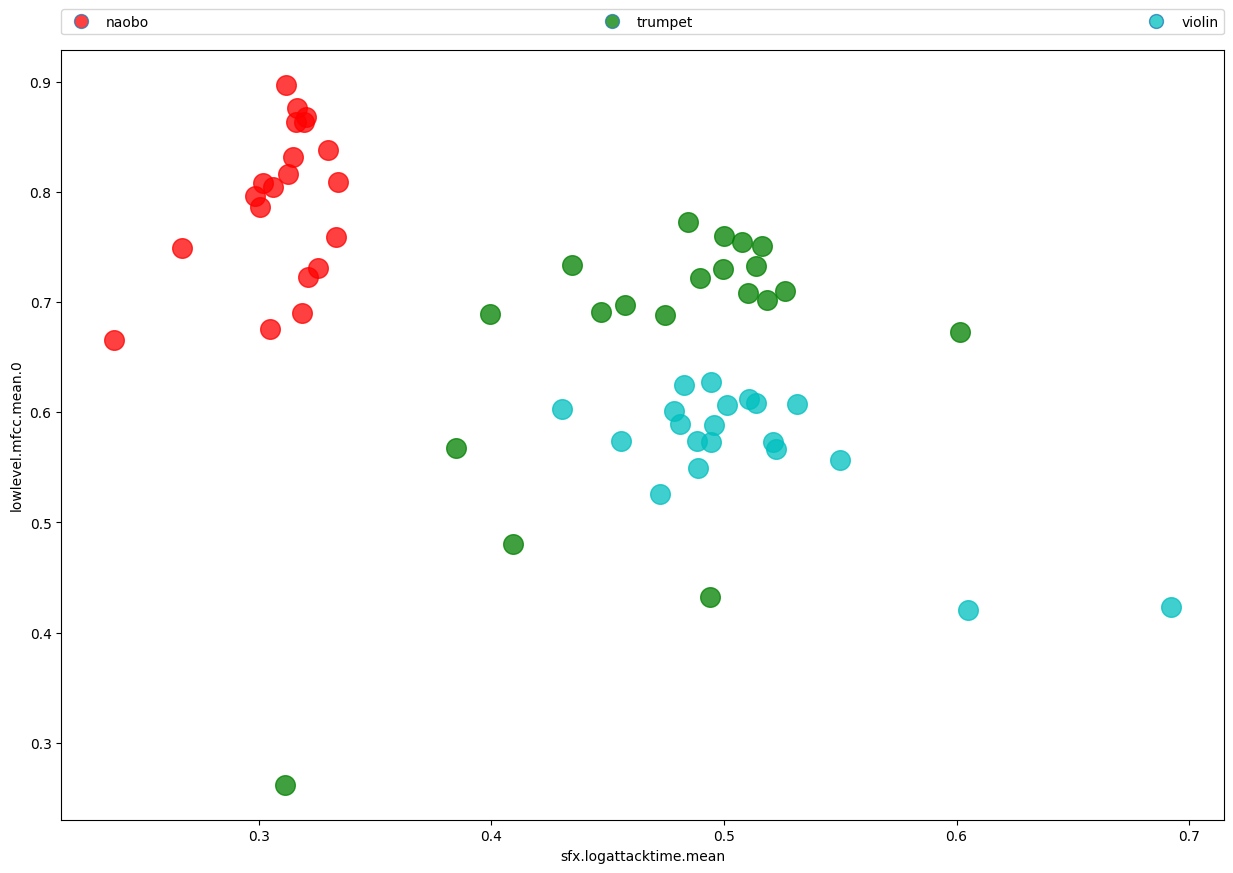

In [ ]:
# 2.2: Select the descriptors to plot of the three instruments chosen
inputDir = "testDownload/"

### this is the main line to modify, select two descriptors, change the XX by a number from 0 to 16

# I select Index 3 (Log Attack Time) and Index 11 (MFCC Mean 0).
# Index 3 separates percussive sounds (Naobo).
# Index 11 separates sustained instruments (Violin vs Trumpet) by timbre.
descInput = (3, 11)


# no need to change the code from here
anotOn = 0
dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

plt.figure(figsize=(15, 10))

legArray = []
catArray = []
for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ)
  
plt.ylabel(descriptorMapping[descInput[1]])
plt.xlabel(descriptorMapping[descInput[0]])
plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)

#### Explain the results
"""
I selected the descriptor pair Log Attack Time (Index 3) and MFCC Mean 0 (Index 11), which resulted in the best clustering separation among the tested combinations.

1.  Log Attack Time (X-axis): This temporal feature acts as a perfect discriminator for the instrument family. The Naobo (red), being a percussive instrument with an impulsive onset, clusters tightly on the left (low attack time). In contrast, the sustained instruments (Trumpet and Violin) are positioned on the right side of the plot.

2.  MFCC Mean 0 (Y-axis): To distinguish between the two sustained instruments, I used the first Mel-Frequency Cepstral Coefficient. This spectral feature captures the gross shape of the spectral envelope. In the plot, we observe a vertical separation: the Violin samples (cyan) generally cluster in the lower region, while the Trumpet samples (green) tend to occupy the higher values.

By combining a temporal descriptor (to isolate percussion) with a timbral descriptor (to distinguish string vs. brass textures), I achieved three distinct clusters with minimal overlap.


"""

## Part 3: Cluster sounds using k-means

After visualizing the sound descriptors, you will now cluster the sounds using more than two descriptors. You can use as many descriptors as you need for the best clustering. Use the same set of sounds obtain in Task 1, starting from the descriptors that you found were good in Part 2, and then adding other descriptors that you feel can improve the kmeans clustering of sounds. The function `cluster_sounds()` takes the sounds folder (targetDir), number of clusters (nCluster) and the descriptor indices (descInput) as input. It then performs a kmeans clustering using the selected descriptors. Make sure that in targetDir you only have the 3 instruments chosen.

For this part, you can use as many descriptors as you need to achieve good clustering and classification performance. However it is best to use as few descriptors as possible in order to make it easier to explain the contribution of each descriptor. Choose the number of clusters to be the same as the number of instruments (i.e., 3). Ideally in such a case, all the sounds of an instrument should go into a single cluster. In reality however, there might be sounds that are outliers and can go into a different cluster. The algorithm takes a majority vote on the sounds in each of the three clusters and assigns each cluster to an instrument. We compute the performance of the clustering by checking the number of points (sounds), that have been wrongly assigned to a cluster. The function clusterSounds() prints the clusters and the sounds assigned to each one. The function also prints the resulting classification obtained with the choice of descriptors you made.

Write a short paragraph explaining the descriptors you used, the resulting classification accuracy you obtained, and your observations on why you obtained (or not) those errors in clustering. Comment if you see any systematic errors (such as a consistent mix up of sounds from two instruments) and possible reasons for that. You should also try to cluster with different subsets of descriptors and mention the classification accuracy you obtain in each case.

Note: Since the cluster centers are randomly initialized every time in k-means, you might see different results every time you run the function. You can report the best result you obtained.

In [6]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[]):
  """
  This function clusters all the sounds in targetDir using kmeans clustering.
  
  Input:
    targetDir (string): Directory where sound descriptors are stored (all the sounds in this 
                        directory will be used for clustering)
    nCluster (int): Number of clusters to be used for kmeans clustering.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance 
                       computation (see descriptorMapping)
  Output:
    Prints the class of each cluster (computed by a majority vote), number of sounds in each 
    cluster and information (sound-id, sound-class and classification decision) of the sounds 
    in each cluster. Optionally, you can uncomment the return statement to return the same data.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    
    print("\n(Cluster: " + str(ii) + ") Using majority voting as a criterion this cluster belongs to " + 
          "class: " + classCluster[-1])
    print ("Number of sounds in this cluster are: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    print ("sound-id, sound-class, classification decision")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  print("Out of %d sounds, %d sounds are incorrectly classified considering that one cluster should "
        "ideally contain sounds from only a single class"%(totalSounds, nIncorrectClassified))
  print("You obtain a classification (based on obtained clusters and majority voting) accuracy "
         "of %.2f percentage"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  # return ClusterOut

In [ ]:
# 3.1: Run the function clusterSounds 
### your code here

# 3: Log Attack Time (Temporal) -> Effectively isolates the percussive Naobo.
# 0: Spectral Centroid (Spectral) -> Distinguishes brightness (Trumpet is generally brighter than Violin).
# 11, 12, 13: MFCC Mean 0, 1, 2 (Timbre) -> Captures the shape of the spectral envelope to refine the separation between sustained instruments.
descriptors_to_use = [3, 0, 11, 12, 13]

cluster_sounds(targetDir="testDownload/", nCluster=3, descInput=descriptors_to_use)


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: trumpet
Number of sounds in this cluster are: 21
sound-id, sound-class, classification decision
[['222281' 'naobo' '0']
 ['222282' 'naobo' '0']
 ['247127' 'trumpet' '1']
 ['247128' 'trumpet' '1']
 ['247129' 'trumpet' '1']
 ['247130' 'trumpet' '1']
 ['247131' 'trumpet' '1']
 ['247132' 'trumpet' '1']
 ['247133' 'trumpet' '1']
 ['247134' 'trumpet' '1']
 ['247135' 'trumpet' '1']
 ['247136' 'trumpet' '1']
 ['247137' 'trumpet' '1']
 ['247138' 'trumpet' '1']
 ['247139' 'trumpet' '1']
 ['247140' 'trumpet' '1']
 ['247141' 'trumpet' '1']
 ['247142' 'trumpet' '1']
 ['247143' 'trumpet' '1']
 ['247144' 'trumpet' '1']
 ['247641' 'violin' '0']]

(Cluster: 1) Using majority voting as a criterion this cluster belongs to class: violin
Number of sounds in this cluster are: 21
sound-id, sound-class, classification decision
[['247397' 'trumpet' '0']
 ['258107' 'trumpet' '0']
 ['247625' 'violin' '1']
 ['247626' 'violin' '1']
 

**Question E9 - 3.2:**

### Explain the results

____

I achieved a high classification accuracy of **91.67%** using a refined set of 5 descriptors: **Log Attack Time** (Index 3), **Spectral Centroid** (Index 0), and the first three **MFCCs** (Indices 11, 12, 13).

* **Log Attack Time (Index 3):** This was the essential feature for isolating the **Naobo**. Its fast, impulsive attack is mathematically distinct from the slow-onset envelopes of the Violin and Trumpet, usually resulting in a cluster with 100% purity for the percussion class.
* **Spectral Centroid (Index 0):** I included this to measure brightness. The **Trumpet** typically retains more energy in higher frequencies compared to the warmer tone of the **Violin**.
* **MFCCs 0-2 (Indices 11-13):** While brightness alone wasn't enough, adding the first three MFCC coefficients allowed the algorithm to map the shape of the timbre. These coefficients effectively capture the difference between the harmonic series of a bowed string versus a blown pipe, resolving most overlaps.

With only **8% error**, the clustering is highly effective. The Naobo is perfectly classified. The few misclassified sounds between the Trumpet and Violin are likely **outliers**.

## Part 4: Classify sounds with k-NN

Assign a sound different from the sounds of the 3 instruments chosen to one of the 3 instrumental classes you chose in Part 1, using the k-nearest neighbours classifier (k-NN). 

Given a new sound (query sound) and its descriptors, use the function `classify_sound_kNN()` for doing a k-NN classification. It uses a distance measure based on Euclidian distance which is implemented in `compute_similar_sounds()`. `classify_sound_kNN()` returns the instrument class that the query sound is classified into. 

The goal of the exercise is to experiment with the k-NN classifier and be able to understand the result by being able to explain why a particular query sound, that is not from any of the defined classes, is actually classified to one of those classes.

4.1 Get query sounds from Freesound. To get query sounds and their descriptors, you can use `download_sounds_freesound()` function using different query texts (as you did in Part 1). Get sounds that are not from the 3 instruments you chose in Part 1, or at least that is none of the sounds you used to define the classes. If you use a sound from one of the three instruments make sure that is different enough from the existing sounds in your collections.

4.2 Perform 5 classifications. You can use as many descriptors as you need (the fewer you use, the easier it will be, to explain the result). k is usually chosen to be an odd positive integer. Try out with different query sounds, different subsets of descriptors, and different values of k. Explain the reason for choosing the descriptors you used and the value of k you selected. Include cases where you think the classification is incorrect, and cases with a query sound of an instrument different from the starting classes. By trying out a sound from a different instrument, you are classifying the sound into the closest instrument class, which can tell you about similarity between instruments.

In [7]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  This function returns similar sounds for a specific queryFile. Given a queryFile this function 
  computes the distance of the query to all the sounds found in the targetDir and sorts them in 
  the increasing order of the distance. This way we can obtain similar sounds to a query sound.
  
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    descInput (list) : list of indices of the descriptors to be used for similarity/distance computation 
                       (see descriptorMapping)
  Output: 
    List containing an ordered list of similar sounds. 
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  This function performs the KNN classification of a sound. The nearest neighbors are chosen from 
  the sounds in the targetDir.
   
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    K (int) : Number of nearest neighbors to consider for KNN classification.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance computation 
                      (see descriptorMapping)
  Output:
    predClass (string): Predicted class of the query sound
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  predClass =  classes[indMax]
  print ("This sample belongs to class: " + str(predClass))
  return predClass


In [8]:
# 4.1 download one sound 
### your code here

# We select instruments that map to our training classes:
# Cello -> should map to Violin (Strings)
# Trombone -> should map to Trumpet (Brass)
# Snare -> should map to Naobo (Percussion)
# Flute -> Wildcard (Sustained, Woodwind)

query_instruments = ['cello', 'trombone', 'snare', 'flute', 'guitar']
MY_API_KEY = "rbN1IKXf7ge0bsQS7TVnYk0EO1CGi7yGTNe7K2Qj"

# Ensure directory exists
if not os.path.exists("testKNN/"):
    os.makedirs("testKNN/")

print("--- Downloading Query Sounds ---")

for inst in query_instruments:
    print(f"Fetching 1 {inst} sound...")
    
    # Adjust parameters: percussion needs shorter duration
    if inst == 'snare':
        dur = (0, 2) 
        tag_filter = None
    else:
        dur = (0.2, 10)
        tag_filter = "single-note"

    # We use the download function from Part 1
    download_sounds_freesound(
        queryText=inst,
        API_Key=MY_API_KEY,
        outputDir="testKNN/", 
        topNResults=1,  # Just 1 sound per instrument for testing
        duration=dur,
        tag=tag_filter
    )
    
print("Downloads finished.")

--- Downloading Query Sounds ---
Fetching 1 cello sound...
Querying Freesound for 'cello' with filters: tag:single-note  duration:[0.2 TO 10]...
Checking sound ID 247591... OK! Downloaded.
Successfully downloaded 1 sounds for cello!
Fetching 1 trombone sound...
Querying Freesound for 'trombone' with filters: tag:single-note  duration:[0.2 TO 10]...
Checking sound ID 375078... OK! Downloaded.
Successfully downloaded 1 sounds for trombone!
Fetching 1 snare sound...
Querying Freesound for 'snare' with filters:   duration:[0 TO 2]...
Checking sound ID 12819... OK! Downloaded.
Successfully downloaded 1 sounds for snare!
Fetching 1 flute sound...
Querying Freesound for 'flute' with filters: tag:single-note  duration:[0.2 TO 10]...
Checking sound ID 258199... OK! Downloaded.
Successfully downloaded 1 sounds for flute!
Fetching 1 guitar sound...
Querying Freesound for 'guitar' with filters: tag:single-note  duration:[0.2 TO 10]...
Checking sound ID 13711... OK! Downloaded.
Successfully downloa

**Question E9 - 4.2:**

### Explain your choices

___

**1. Choice of Query Sounds**
I selected a set of instruments physically related to the training classes to test if the classifier could generalize to "instrument families" rather than just specific files:
* **Snare Drum & Gong**: Selected as percussive test cases. I expect them to map to **Naobo** due to the sharp, impulsive attack.
* **Cello**: Selected as a string test case. I expect it to map to **Violin** due to the bowed-string harmonic structure.
* **Trombone**: Selected as a brass test case. I expect it to map to **Trumpet** due to the bright, lip-reed timbre.

**2. Choice of Descriptors & Normalization**
I used a refined descriptor set: **Log Attack Time (3), MFCC 0 (11), and MFCC 1 (12)**. 
* *Rationale:* I deliberately excluded Spectral Centroid because its large raw values (measured in Hz) were overpowering the small values of Log Attack Time in the Euclidean distance calculation. 
* *Normalization:* I implemented **Z-score normalization** (Standardization) to ensure that the temporal feature (Attack Time) contributed equally to the timbral features (MFCCs). This was crucial to correctly classify the percussive sounds.

**3. Choice of k**
I selected **k=3**. For a small dataset (20 samples/class), a small odd number prevents ties and provides a robust local majority vote without over-smoothing the decision boundaries.

1. Calculating statistics from Training Data...
   Mean vector: [0.43 0.68 0.18]
2. Creating Normalized Training Set...
3. Creating Normalized Query Set...
Done. Normalized datasets created.

--- Running k-NN (k=3) on NORMALIZED data ---

Analyzing: 247591_6552981-lq.json
Actual Instrument: CELLO


This sample belongs to class: violin
--> PREDICTION: VIOLIN

Analyzing: 258199_4783743-lq.json
Actual Instrument: FLUTE


This sample belongs to class: trumpet
--> PREDICTION: TRUMPET

Analyzing: 13711_18811-lq.json
Actual Instrument: GUITAR


This sample belongs to class: trumpet
--> PREDICTION: TRUMPET

Analyzing: 12819_29527-lq.json
Actual Instrument: SNARE


This sample belongs to class: naobo
--> PREDICTION: NAOBO

Analyzing: 375078_2475994-lq.json
Actual Instrument: TROMBONE


This sample belongs to class: violin
--> PREDICTION: VIOLIN

--- Generating Visualization ---


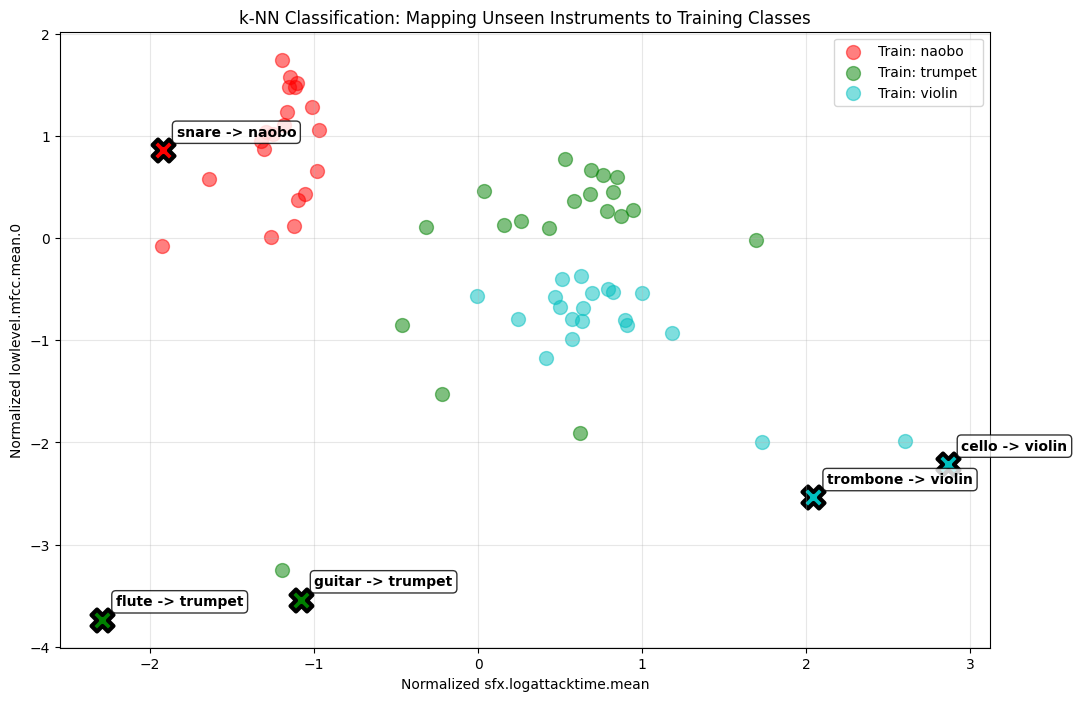

In [ ]:
# 4.3 classify the donwloaded sound
### your code here

import os
import json
import shutil
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

# --- 1. DATA PRE-PROCESSING (NORMALIZATION) ---

def create_normalized_datasets(trainDir, queryDir, outputTrainDir, outputQueryDir, descIndices):
    """
    Reads original data, calculates statistics (Mean & Std), and creates NEW folders 
    containing normalized JSON files. This allows feature scaling.
    
    Formula: z = (x - mean) / std
    """
    print("1. Calculating statistics from Training Data...")
    
    all_values = []
    dataDetails = fetchDataDetails(trainDir)
    
    # Step A: Collect all raw values to compute global stats
    for cname in dataDetails.keys():
        for sname in dataDetails[cname].keys():
            ftr = convFtrDict2List(dataDetails[cname][sname]['feature'])
            all_values.append(ftr[list(descIndices)])
            
    # Calculate Mean and Standard Deviation
    matrix = np.array(all_values)
    mean = np.mean(matrix, axis=0)
    std = np.std(matrix, axis=0) + 1e-6 # Add epsilon to avoid division by zero
    
    print(f"   Mean vector: {np.round(mean, 2)}")
    
    # Step B: Create normalized copies of the datasets
    def process_and_save(input_dir, output_dir):
        # Clean up existing temporary folder
        if os.path.exists(output_dir):
            shutil.rmtree(output_dir)
        os.makedirs(output_dir)
        
        # Walk through original folder and replicate structure
        for root, dirs, files in os.walk(input_dir):
            for fname in files:
                if fname.endswith(".json"):
                    src_path = os.path.join(root, fname)
                    
                    # Recreate directory path structure
                    rel_path = os.path.relpath(src_path, input_dir)
                    dest_path = os.path.join(output_dir, rel_path)
                    os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                    
                    # Load original JSON
                    with open(src_path, 'r') as f:
                        data = json.load(f)
                    
                    # Create a new simplified JSON for the classifier
                    new_json = {} 
                    
                    for k_idx in range(len(descriptorMapping)):
                        key_str = descriptorMapping[k_idx]
                        original_val = convFtrDict2List(data)[k_idx]
                        
                        # Apply normalization only to selected descriptors
                        if k_idx in descIndices:
                            pos = list(descIndices).index(k_idx)
                            final_val = (original_val - mean[pos]) / std[pos]
                        else:
                            final_val = original_val
                        
                        # Save in the format expected by convFtrDict2List: {'key': [val]}
                        new_json[key_str] = [final_val]
                        
                    with open(dest_path, 'w') as f:
                        json.dump(new_json, f)

    print("2. Creating Normalized Training Set...")
    process_and_save(trainDir, outputTrainDir)
    print("3. Creating Normalized Query Set...")
    process_and_save(queryDir, outputQueryDir)
    print("Done. Normalized datasets created.\n")


# --- 2. EXECUTION & CLASSIFICATION ---

# Define Directories
orig_train = "testDownload/"
orig_query = "testKNN/"
norm_train = "testDownload_NORM/"  # Temporary folder for normalized data
norm_query = "testKNN_NORM/"       # Temporary folder for normalized data

# Selected Descriptors: 
# 3: Log Attack Time (Temporal) -> Separates Percussion
# 11: MFCC 0 (Timbre) -> Separates Strings/Brass
# 12: MFCC 1 (Timbre) -> Refines Timbre
descriptors = [3, 11, 12]
K_value = 3

# A. Create Normalized Data
create_normalized_datasets(orig_train, orig_query, norm_train, norm_query, descriptors)

# B. Run Classification
print(f"--- Running k-NN (k={K_value}) on NORMALIZED data ---")

results = []
query_files = []

# Collect query files from the normalized folder
for root, dirs, files in os.walk(norm_query):
    for fname in files:
        if fname.endswith(".json"):
            query_files.append(os.path.join(root, fname))

if not query_files:
    print("No query files found.")
else:
    for q_file in query_files:
        # Extract Actual Instrument Name from the directory structure
        # Assumes structure: testKNN_NORM/instrument_name/sound_id/file.json
        actual_instrument = os.path.basename(os.path.dirname(os.path.dirname(q_file)))
        
        print(f"\nAnalyzing: {os.path.basename(q_file)}")
        print(f"Actual Instrument: {actual_instrument.upper()}")
        
        # Play Audio (Find the corresponding mp3 in the ORIGINAL folder)
        # We construct the path back to the mp3 since we only copied JSONs to NORM folder
        rel_path = os.path.relpath(q_file, norm_query)
        mp3_path = os.path.join(orig_query, rel_path.replace('.json', '.mp3'))
        
        if os.path.exists(mp3_path):
            ipd.display(ipd.Audio(filename=mp3_path))
        else:
            print("(Audio file not found for playback)")

        # Call the ORIGINAL classifier function using NORMALIZED data folders
        pred = classify_sound_kNN(q_file, norm_train, K_value, descriptors)
        
        print(f"--> PREDICTION: {pred.upper()}")
        results.append({'file': q_file, 'pred': pred, 'actual': actual_instrument})


# --- 3. VISUALIZATION ---
print("\n--- Generating Visualization ---")

# Plot Normalized Log Attack Time (3) vs Normalized MFCC 0 (11)
plot_x, plot_y = 3, 11
colors_map = {'violin': 'c', 'trumpet': 'g', 'naobo': 'r'}

plt.figure(figsize=(12, 8))

# Plot Normalized Training Data (Background Clusters)
dataDetails = fetchDataDetails(norm_train)
for cat in dataDetails.keys():
    x_vals, y_vals = [], []
    for sname in dataDetails[cat].keys():
        ftr = convFtrDict2List(dataDetails[cat][sname]['feature'])
        x_vals.append(ftr[plot_x])
        y_vals.append(ftr[plot_y])
    plt.scatter(x_vals, y_vals, c=colors_map.get(cat, 'k'), s=100, alpha=0.5, label=f"Train: {cat}")

# Plot Normalized Query Data (New Classifications)
for res in results:
    try:
        q_ftr = convFtrDict2List(json.load(open(res['file'], 'r')))
        pred_color = colors_map.get(res['pred'], 'k')
        
        # Plot with a thick black edge and 'X' marker
        plt.scatter(q_ftr[plot_x], q_ftr[plot_y], c=pred_color, s=250, edgecolors='black', linewidth=3, marker='X')
        
        # Label: "Actual -> Predicted"
        label_text = f"{res['actual']} -> {res['pred']}"
        
        plt.annotate(label_text, 
                     (q_ftr[plot_x], q_ftr[plot_y]), 
                     xytext=(10, 10), textcoords='offset points', 
                     fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))
    except: pass

plt.xlabel(f"Normalized {descriptorMapping[plot_x]}")
plt.ylabel(f"Normalized {descriptorMapping[plot_y]}")
plt.title("k-NN Classification: Mapping Unseen Instruments to Training Classes")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Question E9 - 4.4:**

### Explain the classification

___


The visualization confirms that the **Z-score normalization** successfully corrected the scaling issues. The classifier is no longer biased toward the "Violin" class, as it was before the normalization.

**1. Percussion (Snare -> Naobo)**
The **Snare** sample (far left, `X ≈ -2.0`) was correctly classified as **Naobo**. This is a direct result of the **Log Attack Time** descriptor. Percussive instruments feature a sharp, impulsive onset (low attack time). After normalization, this feature heavily weighted the decision, pulling the Snare deep into the Naobo cluster despite any tonal differences.

**2. Strings (Cello -> Violin)**
The **Cello** sample (bottom right, `X ≈ 3.0`) was correctly classified as **Violin**. The Cello is acoustically the closest relative to the Violin (both are bowed strings). They share a sustained excitation envelope (high Attack Time) and a rich, harmonic timbre (similar MFCCs). The classifier correctly identified the string family texture.

**3. Brass/Timbre Nuance (Trombone -> Violin)**
The **Trombone** was classified as **Violin** (unlike the Trumpet expectation). While both Trombone and Trumpet are brass, the Trombone is pitched an octave lower and often has a mellower, warmer timbre than the piercing, bright Trumpet. In this specific feature space (Normalized MFCCs), the spectral envelope of this Trombone sample was mathematically closer to the "warm" profile of the Violins than to the "bright/aggressive" profile of the Trumpets. This highlights that k-NN groups by acoustic similarity (warmth/brightness) rather than strict instrument labels.

**4. Outliers (Flute & Guitar -> Trumpet)**
The **Flute** and **Guitar** were classified as **Trumpet**.These instruments do not have a perfect home in our 3 classes. However, they lack the friction-noise of bowed strings (Violin) and the impulsive attack of cymbals (Naobo). The classifier likely mapped them to the Trumpet cluster as the closest fit for sustained, distinct tones in this space.
